# Project 2.3

In [1]:
import json
with open('/Users/rowenahan/.secret/tmbd_api.json') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()



dict_keys(['client-id', 'api-key', 'api-read-token'])

In [2]:
#load tmdbsimple
import tmdbsimple as tmdb
tmdb.API_KEY = login["api-key"]

In [3]:
movie = tmdb.Movies(603)

In [4]:
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/oMsxZEvz9a708d49b6UdZK1KAo5.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 71.055,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [5]:
info['budget']

63000000

In [6]:
info['revenue']

463517383

In [7]:
info['imdb_id']

'tt0133093'

In [8]:
movie = tmdb.Movies('tt1361336')
info = movie.info()
info["budget"]

50000000

In [9]:
#getting certification info from 'release'
releases = movie.releases()
for c in releases["countries"]:
    if c["iso_3166_1"]=="US":
        print(c["certification"])

PG
PG
PG


In [10]:
#ADDING THE CERTIFICATION TO THE DATA
#Get the movie object for the current id
movie = tmdb.Movies('tt1361336')
#save the .info releases dictionaries
info = movie.info()
releases = movie.releases()
#Loop through countries in releases
for c in releases["countries"]:
    #if the country abbreviation==US
    if c["iso_3166_1"]=='US':
        #Save a "certification" key in the info dict with the certification
        info["certification"]=c["certification"]

In [11]:
info

{'adult': False,
 'backdrop_path': '/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg',
 'belongs_to_collection': None,
 'budget': 50000000,
 'genres': [{'id': 35, 'name': 'Comedy'},
  {'id': 10751, 'name': 'Family'},
  {'id': 16, 'name': 'Animation'}],
 'homepage': 'https://www.tomandjerrymovie.com',
 'id': 587807,
 'imdb_id': 'tt1361336',
 'original_language': 'en',
 'original_title': 'Tom & Jerry',
 'overview': 'Tom the cat and Jerry the mouse get kicked out of their home and relocate to a fancy New York hotel, where a scrappy employee named Kayla will lose her job if she can’t evict Jerry before a high-class wedding at the hotel. Her solution? Hiring Tom to get rid of the pesky mouse.',
 'popularity': 43.031,
 'poster_path': '/8XZI9QZ7Pm3fVkigWJPbrXCMzjq.jpg',
 'production_companies': [{'id': 25120,
   'logo_path': '/lMj6nMJBOzfLEd2fu8uF530AJcv.png',
   'name': 'Warner Bros. Pictures Animation',
   'origin_country': 'US'},
  {'id': 8922,
   'logo_path': '/yZWehAyjfKi4KvKeg1bkJ1bm5H8.png',
   'name'

## Adding Certification

In [12]:
def get_movie_with_rating(movie_id):
    """Adaoted from source = https://github.com/celiao/tmdbsimple"""
    #Get the movie object for the current id
    movie=tmdb.Movies(movie_id)

    #save the .info .releases dictionaries
    info = movie.info()

    releases = movie.releases()
    #Loop through countries in releases
    for c in releases["countries"]:
        #if the country appreviation ==US
        if c["iso_3166_1"]=='US':
            #save a "certification" key in info with the certification
            info['certification']=c['certification']

    return info

In [13]:
test = get_movie_with_rating("tt0848228")#put your function name here
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 85.527,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path'

## import packages,check and making folders

In [14]:
#import packages
#MAKING FOLDERS AND LISTING
import os, time, json
import tmdbsimple as tmdb
import pandas as pd
from tqdm.notebook import tqdm_notebook
#create the folder for saving files (if it dosen't exist)
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'title-akas-us-only.csv',
 '.ipynb_checkpoints',
 'movietables.png']

In [21]:
#Define list of years to get from API for outer loop
YEARS_TO_GET=[2001,2002]

In [16]:
#load data(basic.csv)
basics=pd.read_csv('Data/title_basics_cleaned.csv.gz')
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


## Write json function

In [17]:
def write_json(new_data, filename):
    """Appends a list of records (new_data) to a json file (filename). Adapted from: 
    https://www.geeksforgeeks.org/append-to-json-file-using-python/"""

    with open(filename,'r+') as file:
        #first we load existing data into a dict.
        file_data=json.load(file)
        #choose extend or append
        if (type(new_data)==list) & (type(file_data)==list):
            file_data.extend(new_data)
        else:
            file_data.append(new_data)
        #set file's current position at offset
        file.seek(0)
        #convert back to json
        json.dump(file_data,file)

## Loop with inner loop

In [22]:
errors = []

#Start the OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc="YEARS", position=0):

    #Defining the JSON file to store results for year
    JSON_FILE=F'{FOLDER}tmdb_api_results_{YEAR}.json'
    #Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    #if it does not exist: create it
    if file_exists==False:
        #print a message indicating the file is being created
        print(f"Creating {JSON_FILE} for API results for {YEAR}.")
        #save an empty dict with just "imdb_id" to the new json file
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

        #Saving new year as the current df
        df=basics.loc[basics["startYear"]==YEAR].copy()
        #saving movie ids to separate variable
        movie_ids=df["tconst"].copy()
        movie_ids
        
        #load existing data from json into a dataframe alled "previous_df"
        previous_df=pd.read_json(JSON_FILE)
        
        previous_df

        #filter out any ids that are already in the JSON_FILE
        movie_ids_to_get=movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

        #Loop through movie_ids_to_get with a tqdm progress bar
        for movie_id in tqdm_notebook(movie_ids_to_get,
                                      f"Movies from {YEAR}"):
        
            #get index and movie id from list
            try:
                #Retrieve then data for the movie id
                temp=get_movie_with_rating(movie_id)
                #append/extend results to existing fil using a pre_made function
                write_json(temp,JSON_FILE)
                #short 20 ms sleep to prevent overwhelming server
                time.sleep(.02)
        
            except Exception as e:
                errors.append([movie_id,e])
                continue
        
        final_year_df=pd.read_json(JSON_FILE)
        final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip",index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Creating Data/tmdb_api_results_2002.json for API results for 2002.


Movies from 2002:   0%|          | 0/1572 [00:00<?, ?it/s]

In [23]:
print(f'- Total errors: {len(errors)}')

- Total errors: 281


## Glob function

In [24]:
import glob
#use glob to get all filepaths that match the pattern(*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files

['Data/final_tmdb_data_2001.csv.gz', 'Data/final_tmdb_data_2002.csv.gz']

In [25]:
df=pd.concat([pd.read_csv(f) for f in tmdb_files])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1232.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,tt6449044,0.0,/a9pkw8stijESGx1flSGPqcXLkHu.jpg,"{'id': 957260, 'name': 'The Conman Collection'...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,314105.0,cn,賭俠2002,...,0.0,97.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,The Conman 2002,0.0,4.300,3.0,NaN
1288,tt6694126,0.0,/sXjVpTZyDvwzPVZve3AmyCUBeHk.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,819174.0,fa,عروس خوش‌قدم,...,0.0,101.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Lucky Bride,0.0,8.000,1.0,NaN
1289,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,...,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.000,0.0,NaN
1290,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,...,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.000,0.0,NaN


## combining data

In [26]:
df.to_csv(f"{FOLDER}tmdb_results_combined.csv.gz", compression="gzip",index=False)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2642 entries, 0 to 1291
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2642 non-null   object 
 1   adult                  2640 non-null   float64
 2   backdrop_path          1512 non-null   object 
 3   belongs_to_collection  216 non-null    object 
 4   budget                 2640 non-null   float64
 5   genres                 2640 non-null   object 
 6   homepage               213 non-null    object 
 7   id                     2640 non-null   float64
 8   original_language      2640 non-null   object 
 9   original_title         2640 non-null   object 
 10  overview               2583 non-null   object 
 11  popularity             2640 non-null   float64
 12  poster_path            2403 non-null   object 
 13  production_companies   2640 non-null   object 
 14  production_countries   2640 non-null   object 
 15  rele

## Graphs

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

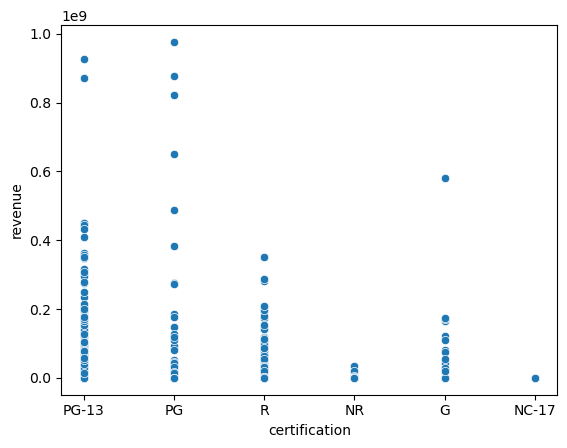

In [30]:
ax=sns.scatterplot(data=df,x="certification",y="revenue")

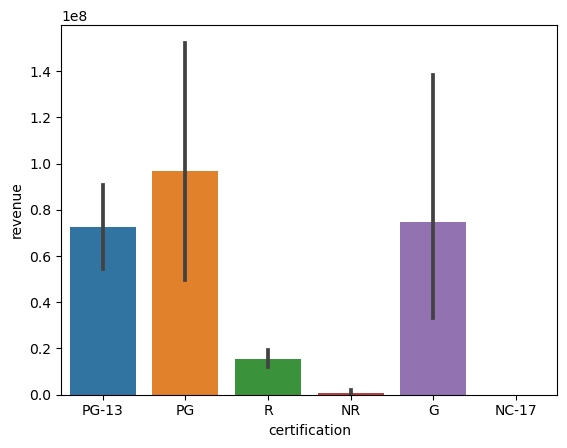

In [31]:
ax=sns.barplot(data=df,x="certification",y='revenue')

### Certification count

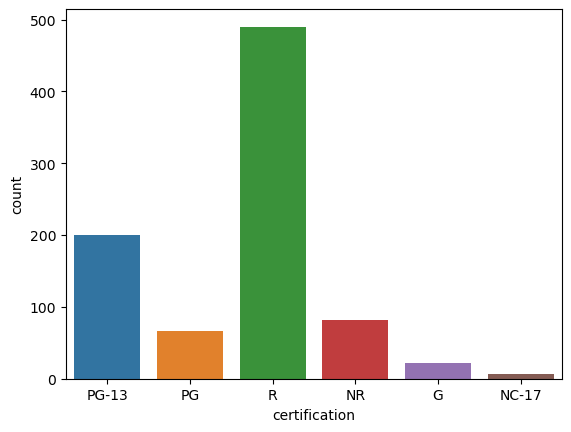

In [40]:
ax=sns.countplot(data=df,x="certification");

### Filtering out 0 for budget

In [34]:
no_0=df["budget"]>0

In [36]:
df_filtered=df[no_0]
df_filtered

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1232.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
5,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.194,31.0,R
9,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.684,2577.0,R
10,tt0120737,0.0,/x2RS3uTcsJJ9IfjNPcgDmukoEcQ.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.403,23351.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,tt0845952,0.0,/6gvLQZyzKi1QUO6KKoZgn0LFOa9.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,462987.0,en,666: Salem Calling,...,0.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,666: Salem Calling,0.0,5.700,3.0,NaN
1238,tt1039983,0.0,/7B5IQdNNyNsSwBaW9zzCT9XmAcJ.jpg,NaN,500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,69419.0,ta,ரெட்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Red,0.0,5.100,7.0,NaN
1242,tt11790094,0.0,NaN,NaN,2000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,973480.0,en,Dracula Vs Frankenstein,...,0.0,81.0,[],Released,The legendary lost underground cult horror com...,Dracula Vs Frankenstein,0.0,10.000,1.0,NaN
1244,tt11841078,0.0,NaN,NaN,1000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,401067.0,en,Fatal Possession,...,0.0,78.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Her Passion Is High, Her Touch Is Deadly.",Fatal Possession,0.0,0.000,0.0,NaN


In [38]:
df_filtered = df.loc[no_0]
df_filtered

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1232.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
5,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.194,31.0,R
9,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.684,2577.0,R
10,tt0120737,0.0,/x2RS3uTcsJJ9IfjNPcgDmukoEcQ.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.403,23351.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,tt0845952,0.0,/6gvLQZyzKi1QUO6KKoZgn0LFOa9.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,462987.0,en,666: Salem Calling,...,0.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,666: Salem Calling,0.0,5.700,3.0,NaN
1238,tt1039983,0.0,/7B5IQdNNyNsSwBaW9zzCT9XmAcJ.jpg,NaN,500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,69419.0,ta,ரெட்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Red,0.0,5.100,7.0,NaN
1242,tt11790094,0.0,NaN,NaN,2000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,973480.0,en,Dracula Vs Frankenstein,...,0.0,81.0,[],Released,The legendary lost underground cult horror com...,Dracula Vs Frankenstein,0.0,10.000,1.0,NaN
1244,tt11841078,0.0,NaN,NaN,1000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,401067.0,en,Fatal Possession,...,0.0,78.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Her Passion Is High, Her Touch Is Deadly.",Fatal Possession,0.0,0.000,0.0,NaN


### Avg budget by Certification

<Axes: xlabel='certification', ylabel='budget'>

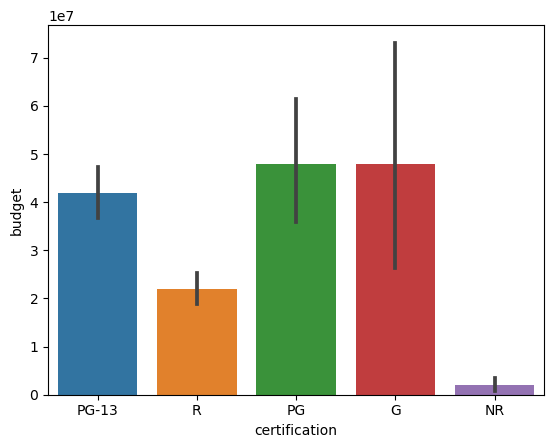

In [39]:
sns.barplot(data=df_filtered,x="certification",y="budget")

### Budget Graph

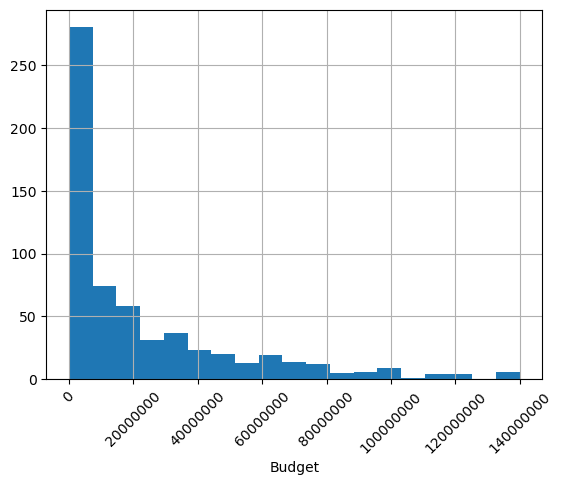

In [41]:
ax=df_filtered['budget'].hist(bins='auto')
ax.ticklabel_format(style='plain')
ax.tick_params(axis="x",rotation=45)
ax.set_xlabel('Budget');

### Avg Budget

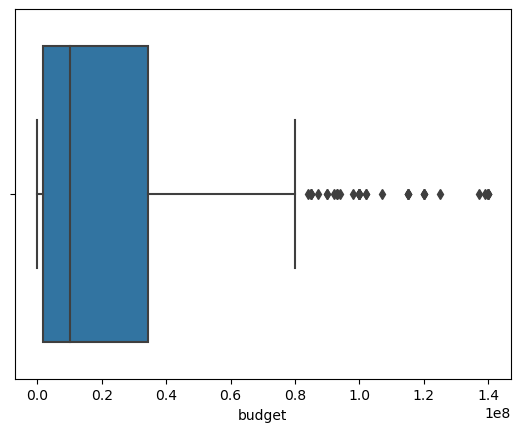

In [57]:
ax=sns.boxplot(data=df_filtered,x='budget')

In [49]:
no_bud=df["budget"]==0

In [50]:
no_bud.value_counts()

True     2024
False     618
Name: budget, dtype: int64

    - 618 movies had budgets

### Filtering out 0 for revenue

In [42]:
rev_filter=df.loc[df['revenue']>0]
rev_filter

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1232.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
6,tt0119004,0.0,/7xrlSPGDO4CDT6IHTctDlkYxTzw.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,37857.0,en,Don's Plum,...,6297.0,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Tonight's Special - Group Therapy,Don's Plum,0.0,5.257,74.0,NaN
9,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.684,2577.0,R
10,tt0120737,0.0,/x2RS3uTcsJJ9IfjNPcgDmukoEcQ.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.403,23351.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,tt0482364,0.0,/8yEvqPc0UFVBm8ZRWZfIkYyWiuo.jpg,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://web.archive.org/web/20080305041542/htt...,158838.0,ja,仮面ライダー龍騎 劇場版 EPISODE FINAL,...,10965812.0,78.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,An Epic Battle Beyond Imagination!,Masked Rider RYUKI Episode Final,0.0,7.600,11.0,NaN
1223,tt0757920,0.0,/sOkmFOVcDmH2P4GU9Mvyc4ZBC3D.jpg,NaN,10000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,44078.0,fa,Dokhtar-e shirini-foroosh,...,10000.0,105.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Pastry Girl,0.0,1.000,1.0,NaN
1235,tt0997084,0.0,/A9Yy4ZRJgTXlKa1KOV92YLTCppn.jpg,"{'id': 23456, 'name': 'One Piece Collection', ...",0.0,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",https://one-piece.com/comicsanime/movie/detail...,44725.0,ja,ワンピース 珍獣島のチョッパー王国,...,13107237.0,56.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,"Tony T. Chopper, the new Animal King!",One Piece: Chopper's Kingdom on the Island of ...,0.0,6.840,159.0,PG-13
1238,tt1039983,0.0,/7B5IQdNNyNsSwBaW9zzCT9XmAcJ.jpg,NaN,500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,69419.0,ta,ரெட்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Red,0.0,5.100,7.0,NaN


### Avg Revenue by certification

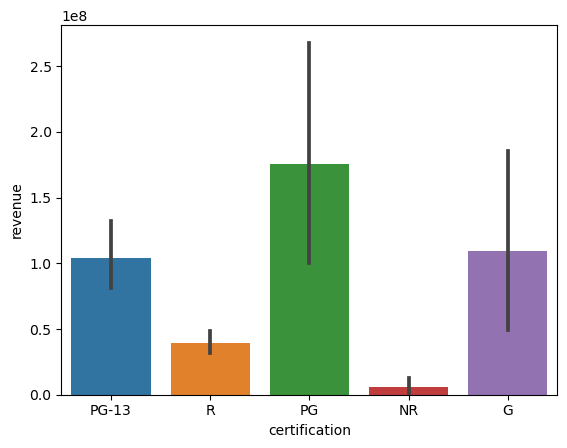

In [58]:
ax=sns.barplot(data=rev_filter,x='certification',y="revenue")

### Revenue Graph

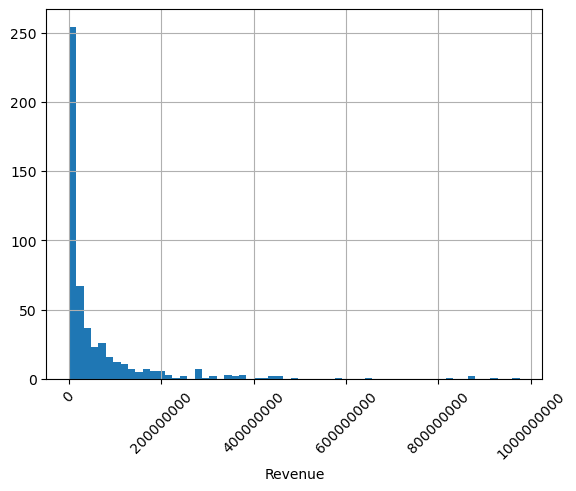

In [43]:
ax=rev_filter['revenue'].hist(bins='auto')
ax.ticklabel_format(style='plain')
ax.tick_params(axis="x",rotation=45)
ax.set_xlabel('Revenue');

In [47]:
no_rev=df["revenue"]==0

In [48]:
no_rev.value_counts()

True     2125
False     517
Name: revenue, dtype: int64

    - 517 had revenue

### Ave Revenue

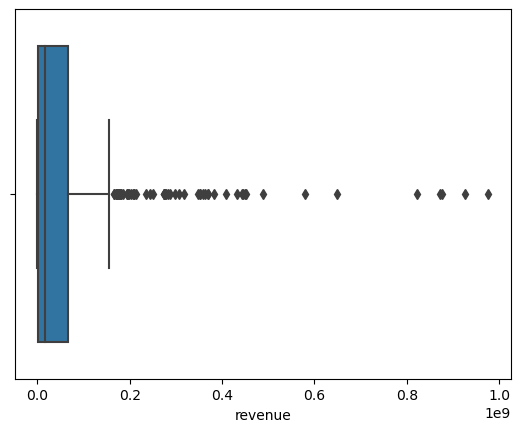

In [55]:
ax=sns.boxplot(data=rev_filter,x='revenue')